<font color="red"><b> Task Level:ADVANCED </font> <br>
<font color="red"><b> Task No:5 </font>


<font color="green"><b> Project Name:Develop A Neural Network That Can Read Handwriting </font> <br>
<font color="green"><b> Name: Muzamil Amin</font> <br>
<font color="green"> language: python</font>

##<b> Importing the required library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## <b> Loading the data from keras datasets

In [2]:
objects = tf.keras.datasets.mnist
(training_images, training_labels), (test_images,test_labels) =  objects.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


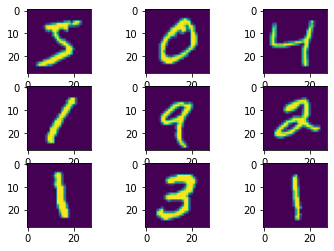

In [4]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(training_images[i])

#### <b> These images are always read as a pixel  and each image pixels are in the range of 0 to 255 the 1st image in our training set is given below

In [5]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## <b> Normalization (scaling in order to get each pixels in the range of 0 to 1)

In [6]:
training_images = training_images.astype("float") / 255.0
test_images = test_images.astype("float") / 255.0

In [7]:
from keras.utils import np_utils

training_labels = np_utils.to_categorical(training_labels, 10)     
test_labels = np_utils.to_categorical(test_labels, 10)

In [8]:
training_images[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
np.unique(training_labels)

array([0., 1.], dtype=float32)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Activation

# <b>reshaping for cnn

In [11]:
training_images = np.array(training_images).reshape(-1,28,28,1)
test_images = np.array(test_images).reshape(-1,28,28,1)
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## <b>Model Building

In [12]:
#creating the model
model = Sequential()

#adding the 1st convolutional layer 
model.add(Conv2D(64,(3,3), input_shape=training_images.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))  ## adding Dropout to avoid overfitting

#adding 2nd convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#adding the 3rd convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#adding flatten for Flattening the data to get 1d data
model.add(Flatten())

#adding 1st fully connected layer
model.add(Dense(64))
model.add(Activation('relu'))

#adding 2nd dense connected layer
model.add(Dense(32))
model.add(Activation('relu'))

#adding last dense connected layer
model.add(Dense(10))  # output must be equal to number of classes, so last dense  connected layer is equal to 10
model.add(Activation('softmax'))  ## activation function changed to softmax for class probabilities



In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                        

## <b>Model compiling

In [14]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


## <b>Model fitting



In [16]:
np.random.seed(24)

model.fit(x=training_images,y=training_labels, epochs=30,validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 24s 11ms/step - loss: 0.4504 - accuracy: 0.8553 - val_loss: 0.1338 - val_accuracy: 0.9597
Epoch 2/30
1313/1313 [==============================] - 15s 11ms/step - loss: 0.1566 - accuracy: 0.9528 - val_loss: 0.0779 - val_accuracy: 0.9761
Epoch 3/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.1201 - accuracy: 0.9634 - val_loss: 0.0649 - val_accuracy: 0.9812
Epoch 4/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0980 - accuracy: 0.9700 - val_loss: 0.0594 - val_accuracy: 0.9823
Epoch 5/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0883 - accuracy: 0.9732 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 6/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 7/30
1313/1313 [==============================] - 14s 11ms/step - loss: 0.0737 - accuracy: 0.9771 - val_loss: 0.0505 -

## <b> Evaluation



In [17]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print('test loss on 10000 test sample:', test_loss)
print('test accuracy on 10000 test sample:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9896
test loss on 10000 test sample: 0.03865136206150055
test accuracy on 10000 test sample: 0.9896000027656555


# <b>Predictions

In [18]:
predictions = model.predict(test_images)
predictions

array([[4.36610557e-12, 2.08704705e-07, 2.89319428e-06, ...,
        9.99996781e-01, 8.63409984e-13, 7.27865823e-10],
       [4.54403496e-13, 5.31327544e-07, 9.99999404e-01, ...,
        8.49419095e-08, 2.92301753e-14, 1.87827057e-15],
       [9.57866703e-11, 9.99999642e-01, 2.48154208e-07, ...,
        3.62693733e-08, 5.14675378e-08, 9.13244758e-11],
       ...,
       [1.47302691e-11, 1.26924942e-08, 1.17149901e-09, ...,
        2.32882318e-08, 2.48368735e-07, 2.40914524e-08],
       [1.85410499e-07, 1.13843743e-11, 1.27342865e-08, ...,
        1.98946110e-10, 4.17887395e-06, 4.34129470e-06],
       [3.06102237e-08, 6.52050969e-10, 1.83230348e-10, ...,
        2.43125242e-11, 1.10159348e-07, 2.60690829e-13]], dtype=float32)

In [19]:
print(np.argmax(model.predict(test_images[range(33,40)]) ,axis=1))

[4 7 2 7 1 2 1]


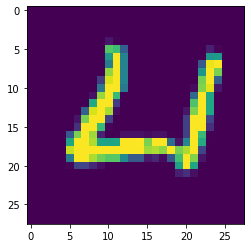

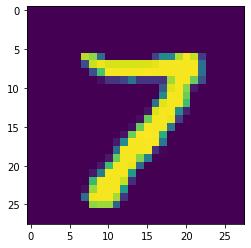

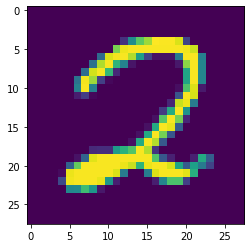

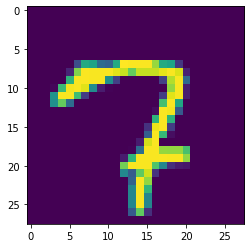

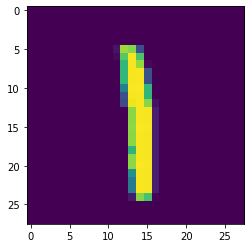

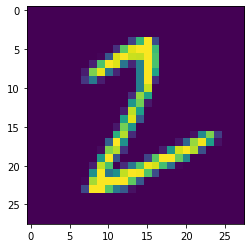

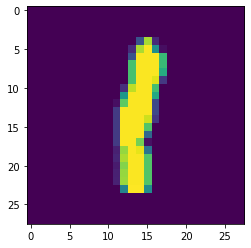

In [20]:
for i in range(33,40):
  plt.imshow(test_images[i].reshape(28,28))
  plt.show()
